# Five Analyses of Seattle AirBnB Ratings

### Purpose of Anaysis:

Analyze AirBnB host and lodger behaviours to gain some insight into the AirBnB market in Seattle during 2016.

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

import seaborn as sns
%matplotlib inline

review_df = pd.read_csv('seattle_reviews.csv')
listings_df = pd.read_csv('seattle_listings.csv')
calendar_df = pd.read_csv('seattle_calendar.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Have a first look at the data we have at hand

In [2]:
review_df.head(n=2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


# CHECK THE REVIEW DATAFRAME FOR USEFULNESS TO THE MODEL

review_df.select_dtypes(include=['object']).head()

	date	    reviewer_name	comments
0	2015-07-19	Bianca	        Cute and cozy place. Perfect location to every...
1	2015-07-20	Frank	        Kelly has a great room in a very central locat...
2	2015-07-26	Ian	            Very spacious apartment, and in a great neighb...
3	2015-08-02	George	        Close to Seattle Center and all it has to offe...
4	2015-08-10	Ming	        Kelly was a great host and very accommodating ...

# This dataframe will not be used in this phase of the analysis 

In [3]:
listings_df.head(n=2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [4]:
calendar_df.head(n=2)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


In [5]:
calendar_df.head(n=2)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


In [0]:
# remove nans from dates and prices in the calendar df
# calendar_df = calendar_df.sort_values('listing_id').drop_duplicates(subset=['date', 'price'], keep='last')

calendar_df = calendar_df.dropna(subset=['date'], axis=0)
calendar_df = calendar_df.dropna(subset=['price'], axis=0)


# making a bool series for duplicated dates and prices in the calendar df
bool_series = calendar_df.duplicated(subset=['date','price'], keep=False)

In [7]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


In [0]:
# Convert prices into floats by removing the currency signs
calendar_df[calendar_df.columns[3:]] = calendar_df[calendar_df.columns[3:]].replace('[\$,]', '', regex=True).astype(float)


In [9]:
calendar_df.head()


,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


In [0]:
# Convert prices into floats by removing the currency signs
listings_df.price = listings_df.price.replace('[\$,]', '', regex=True).astype(float)


In [0]:
# Convert dates to datetime to plot AirBnB pricing across 2016
calendar_df['date'] = [datetime.datetime.strptime(d, '%Y-%m-%d') for d in calendar_df['date']]


# Q1. How does pricing change during 2016?

Text(0, 0.5, 'Price/$')

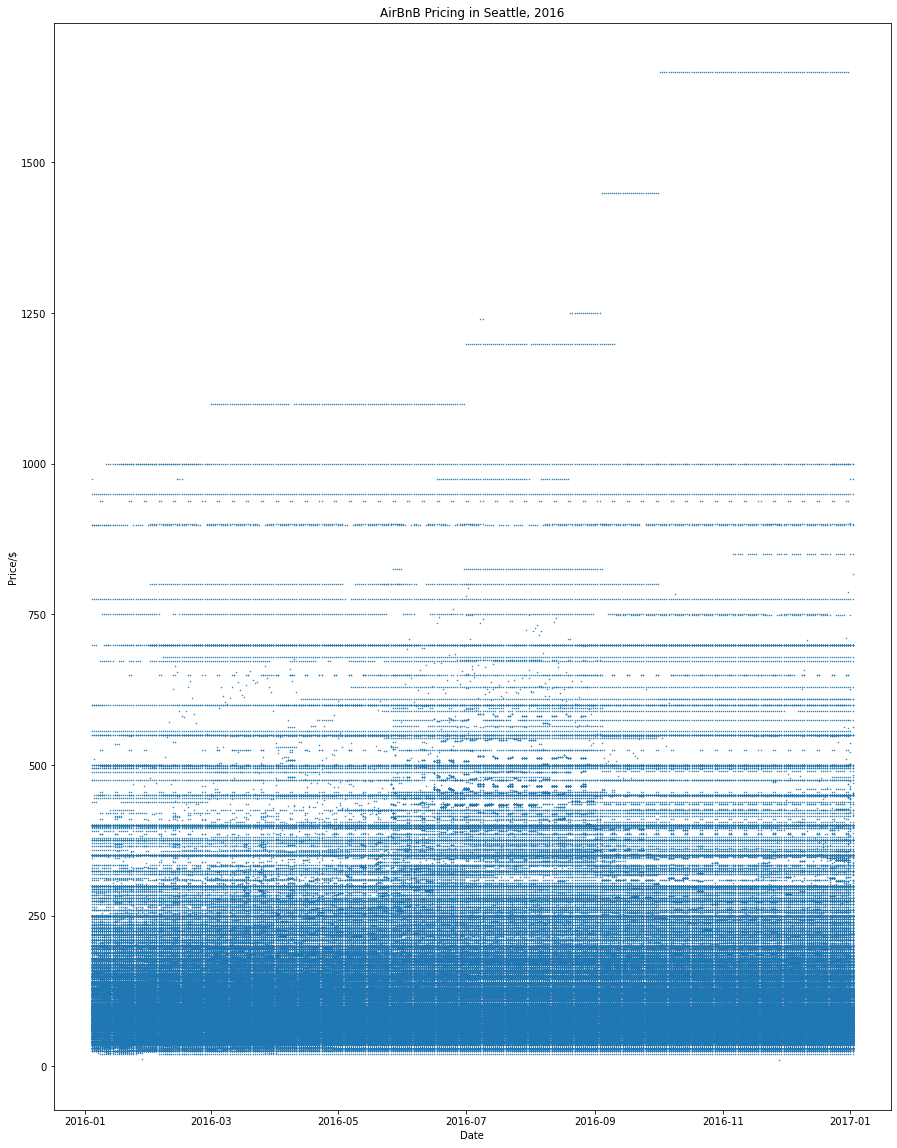

In [12]:
fig = plt.figure(figsize=(15,20))
ax = fig.add_subplot(111)
ax.plot_date(x=calendar_df.date, y=calendar_df.price, marker='.', ms = 1.0, xdate=True)

ax.set_title('AirBnB Pricing in Seattle, 2016')
ax.set_xlabel('Date')
ax.set_ylabel('Price/$')

### There is a larger variety of prices over the summer months
### There appears to be more prices/properties available during the summer

### The maximum price increases as the year progresses
### January and February appear cheaper than other months

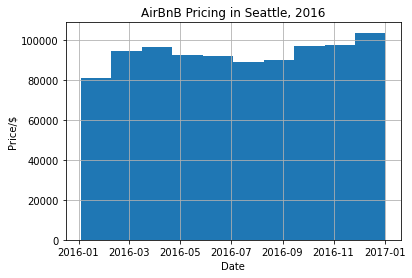

In [13]:
calendar_df.date.hist()

plt.title('AirBnB Pricing in Seattle, 2016')
plt.xlabel('Date')
plt.ylabel('Price/$')

plt.show()


### Seattle pricing increases to the highest over June to August

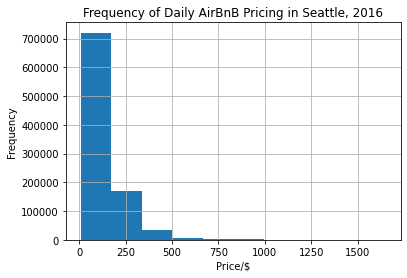

In [14]:
calendar_df.price.hist()

plt.title('Frequency of Daily AirBnB Pricing in Seattle, 2016')
plt.xlabel('Price/$')
plt.ylabel('Frequency')

plt.show()


### The most frequent range of prices is up to 200 US dollars
### The highest prices are above 1000 US dollars a night

## The dimensions of the listing and calendar dataframes

In [15]:
num_rows_listings_df = listings_df.shape[0] #Provide the number of rows in the dataset
num_cols_listings_df = listings_df.shape[1] #Provide the number of columns in the dataset
print(num_rows_listings_df)
print(num_cols_listings_df)

3818
92


In [16]:
num_rows_calendar_df = calendar_df.shape[0] #Provide the number of rows in the dataset
num_cols_calendar_df = calendar_df.shape[1] #Provide the number of columns in the dataset
print(num_rows_calendar_df)
print(num_cols_calendar_df)

934542
4


In [17]:
# Before dropping listing columns for the model fit
listings_df.head(n=1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85.0,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [18]:
# After dropping listing columns that will not be used in the immediate analysis
listings_df.head(n=1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85.0,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


### Convert rates from percentages to floats

In [0]:
# Remove percentage sign from host_response_rate
listings_df['host_response_rate'] = listings_df['host_response_rate'].astype(str).map(lambda x: x.rstrip('%'))
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate'].astype(str).map(lambda x: x.rstrip('%'))

In [0]:
# Fill response rates with zero (rather than the mean) since no response was provided
listings_df['host_response_rate'] = listings_df['host_response_rate'].astype(float).fillna(0)
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate'].astype(float).fillna(0)


In [21]:
# After removing percentage signs from listing columns 
listings_df.head(n=1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96.0,100.0,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85.0,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [22]:
#Check for review columns with more than 50% of the values missing
most_missing_review_cols = set(review_df.columns[review_df.isnull().sum()/len(review_df) > .75])
most_missing_review_cols


set()

In [23]:
#Check for review columns with more than 50% of the values missing
most_missing_listings_cols = set(listings_df.columns[listings_df.isnull().sum()/len(listings_df) > .75])
most_missing_listings_cols


{'license', 'square_feet'}

### License and Square feet wouldn't be good variables to use since there is less than 25% data in those columns - so we'll drop them

## Merge listings and calendar into one dataframe

In [0]:
# Merge the listings with the calendar dfs to create a new combined dataframe
df = listings_df.merge(calendar_df, left_on='id', right_on='listing_id')    #merge(review_df, left_on='id', right_on='listing_id')


In [0]:
threshold = 0.75

#Dropping columns with missing value rate higher than threshold -- square_feet has less than 5% data
df = df[df.columns[df.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
df = df.loc[df.isnull().mean(axis=1) < threshold]

###  Find the location boundary of AirBnBs in Seattle, and create a map

In [26]:
BBox = (df.longitude.min(),df.longitude.max(),
        df.latitude.min(), df.latitude.max())

print(BBox)


(-122.41721881425622, -122.24060703053992, 47.50508834369015, 47.73335790856483)


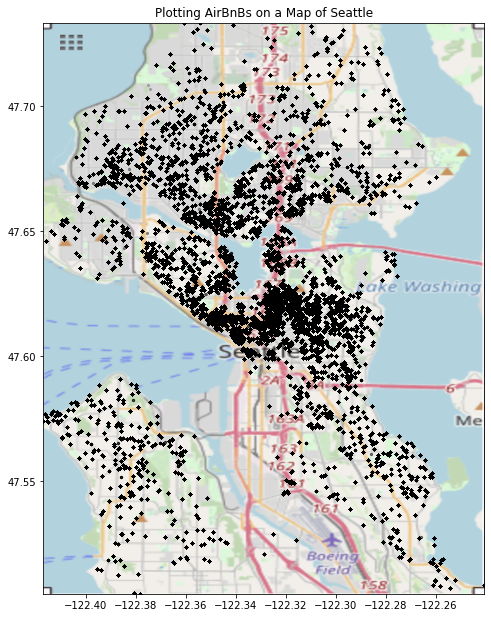

In [27]:
sea_m = plt.imread('airbnb_sea.png')

fig, ax = plt.subplots(figsize = (12,10.5))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.2, c='k', s=5)
ax.set_title('Plotting AirBnBs on a Map of Seattle')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(sea_m, zorder=0, extent = BBox, aspect= 'equal')


In [0]:
# Drop columns with ids, urls, date-related, location-related variables, 
df = df.drop(['listing_url','scrape_id','last_scraped',
 'space','description','experiences_offered','neighbourhood','name',
 'neighborhood_overview','notes','street','host_location','summary',
 'transit','host_verifications','picture_url','xl_picture_url',
 'host_since','neighbourhood_cleansed','city','state','zipcode',
 'market','smart_location','country_code','country','calendar_last_scraped',
 'first_review','last_review','requires_license','jurisdiction_names',
 'instant_bookable','is_location_exact','has_availability','host_name',
 'host_about','thumbnail_url','medium_url','host_id','host_url',
 'id','latitude','longitude','listing_id','date',
 'host_thumbnail_url','host_picture_url'],axis=1)

In [0]:
# Compute the correlation matrix
corr_p = df.corr(method ='pearson')

In [0]:
# Compute the correlation matrix
corr_k = df.corr(method ='kendall')

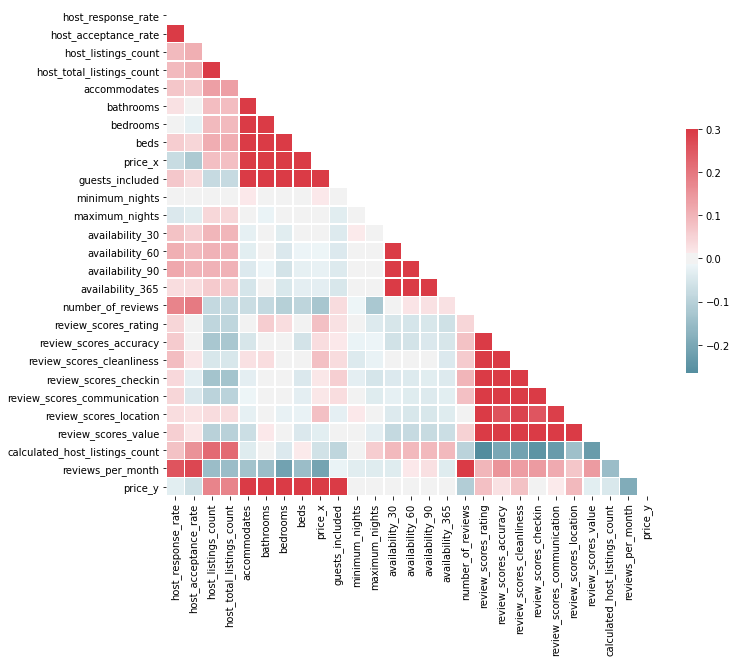

In [31]:
# Generate a mask for the upper triangle
mask_p = np.triu(np.ones_like(corr_p, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_p, mask=mask_p, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

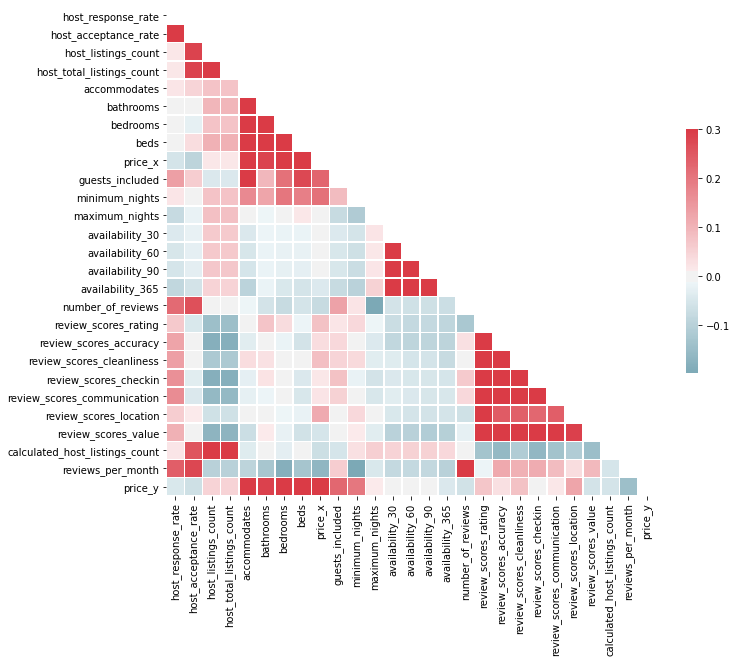

In [32]:
mask_k = np.triu(np.ones_like(corr_k, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_k, mask=mask_k, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### ^^ Review scores increase with the number of bathrooms, bedrooms, and minimum nights

### The dimensions of the dataframe

In [33]:
df.shape

(934542, 47)

### Predicting ...

Let's determine rating values based on the host's property details and their relationship with their customers.
Listing and Review data wil be merged for this analysis.

In [34]:
# Remove all NaNs

see_nonans = df.dropna()
see_nonans.shape

(169409, 47)

### We lost more than 765000 rows! - Dropping all NAs isn't a good idea

# Numerical Variables
First let's investigate the numerical values and apply a linear regression model to check linearity of the variables

In [35]:
# Subset to a dataframe only holding the numerical columns
num_df = df.select_dtypes(include=['float','int']).copy()

# Print how many numerical columns are in the dataframe
num_df.shape[1]

27

In [36]:
# Copy of the numerical df
num_df_copy = num_df.copy()
num_cols_lst = num_df.columns
num_cols_lst # list of numerical columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price_x', 'guests_included', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'price_y'],
      dtype='object')

In [0]:
drop_num_df = num_df_copy.dropna(subset=['review_scores_value'], axis=0)

# Mean function
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
fill_df = drop_num_df.apply(fill_mean, axis=0)


In [38]:
#Split into explanatory and response variables
X = fill_df[['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price_x', 'guests_included', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'calculated_host_listings_count',
       'reviews_per_month', 'price_y']]
y = fill_df['review_scores_value']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.5287607595125832 on 236529 values.'

### 53% accuracy isn't bad but we'll try to improve this by including categorical variables into the model.

# Categorical Variables
Next let's investigate the categorical values using 0, 1 encodings. A dummy dataframe of the variables will be created and a linear regression model applied again to check linearity of the variables

In [39]:
#Pull a list of the column names of the categorical variables

# Subset to a dataframe only holding the categorical columns
cat_df = df.select_dtypes(include=['object'])

# Print how many categorical columns are in the dataframe
cat_df.shape[1]

20

In [0]:
#Create a copy of the dataframe
cat_df_copy = cat_df.copy()
# cat_df: cat_copy_cols = cat_df_copy.columns
# Drop cols in place: cat_df_copy.drop(cat_df_copy.columns, axis=1, inplace=True)
# Get dummies of cat cols including NaNs: pd.get_dummies(df[cat_cols_lst],dummy_na=True)

#Get a list of the column names of the categorical variables
cat_cols_lst = cat_df_copy.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in cat_cols:
        try:
            # for each category add dummy var, drop original column
            # concat columns together as the original cat_cols are dropped and the new dummy_cols are created
            # drop_first removes NaN; False keeps NaN in the df
            # dummy_na=False will not include NaNs in the dummy_df
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    
    return df


### What will the output of create_dummy look like?

In [0]:
#Done later: Drop NAs where the salary has missing values
# -- df  = df.dropna(subset=['review_scores_value'], axis=0)

# -- df_new = create_dummy_df(df, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show a header of df_new to check
# -- print(df_new.shape)

# -- (788428, 3781)


# Combining Numerical and Categorical columns into the linear model.

In [41]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    
    #Drop the rows with missing reviews
    drop_rev_df = df.dropna(subset=['review_scores_value'], axis=0)
    
    df = df.dropna(subset=['review_scores_value'], axis=0)
    y = df['review_scores_value']
    
    #---- no need: df = df.drop([''], axis=1)
    
    #For each numeric variable in X, fill the column with the mean value of the column.
    #Subset to a dataframe only holding the numeric columns
    num_df = df.select_dtypes(include=['float','int']).columns
    for col in num_df:
        df[col].fillna((df[col].mean()), inplace=True)        
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in cat_vars:
        # for each category, add dummy variables, and drop the original categorical column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

    return r2_score(y_test, y_test_preds)
    
    
#Use the function to create X and y
r_score_ = clean_data(df)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


# Predict review_scores_value

In [42]:
print(r_score_)

0.5287607595125832


## Considering there is no difference in the r-squared value when categorical variables are combined with numerical values, ensemble models would be the next choice instead of a linear model.

### For an ensemble model the decisions from multiple models will be combined to improve the overall performance from 53%

## Phase 2 will take place later in 2020


## Using Python Sklearn

Since the numerical variables didn't fit the linear model very well (at 53%) we'll try ensemble learning. By combining different models this will lead to more flexibility (less bias) and less data sensitivity (less variance).